# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Projeto 2</font>

## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

![DSA](imagens/projeto2.png)

In [2]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [4]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [5]:
# Shape
df_dsa.shape

(9700, 11)

In [6]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [7]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [8]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [9]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [10]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [11]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [12]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [13]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [14]:
df_dsaos = df_dsa[(df_dsa.Categoria == 'Office Supplies')]


In [22]:
df_Total = df_dsaos.groupby('Cidade')['Valor_Venda'].sum()
print(df_Total)

result = df_Total.idxmax()
numresult = df_Total.max()
print(result)
print(numresult)

Cidade
Aberdeen         25.500
Abilene           1.392
Akron          1107.646
Albuquerque     943.122
Alexandria     4879.790
                 ...   
Woonsocket      142.590
Yonkers         665.964
York            395.920
Yucaipa          50.800
Yuma             55.352
Name: Valor_Venda, Length: 480, dtype: float64
New York City
68362.814


## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [16]:
dfDatas = df_dsa['Data_Pedido'].count()

dfVendas = df_dsa.groupby('Data_Pedido')['ID_Pedido'].count()




Text(0.5, 1.0, 'Numero de vendas por data')

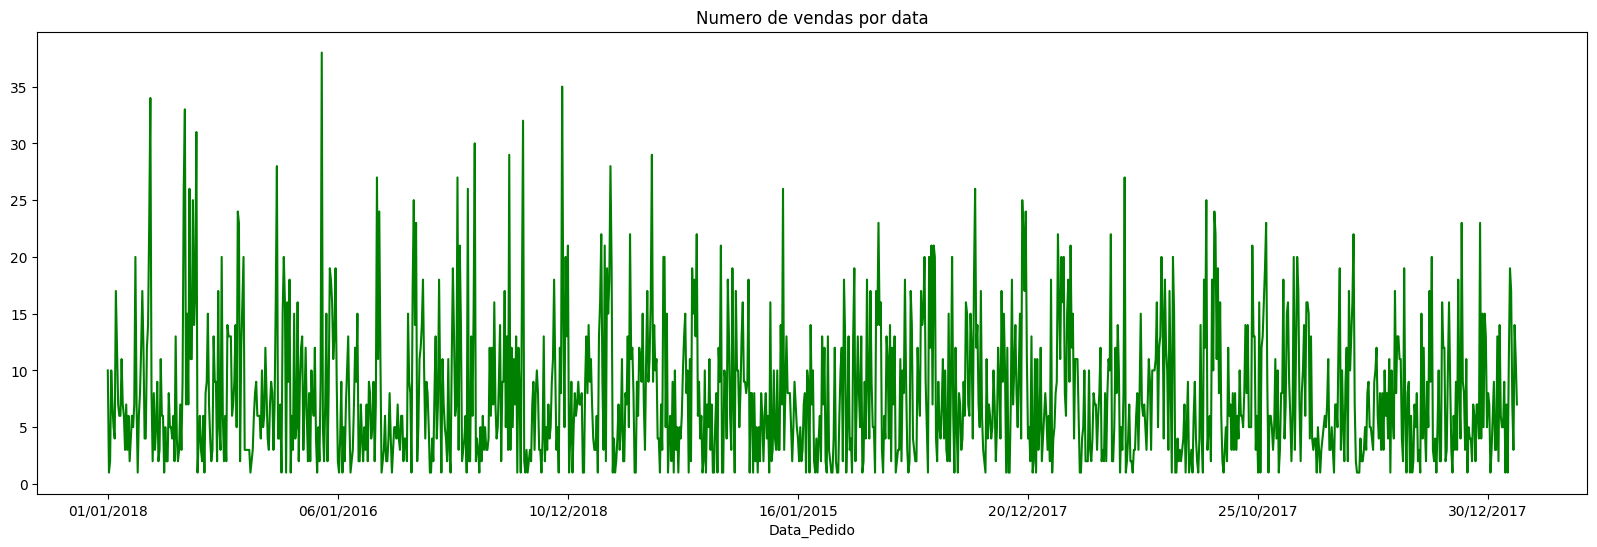

In [17]:
plt.figure(figsize = (20, 6))
dfVendas.plot(x= 'Data_Pedido',y='ID_Pedido', label = 'Barras', color = 'green')
plt.title('Numero de vendas por data')

In [18]:
print(dfVendas)

Data_Pedido
01/01/2018    10
01/02/2015     1
01/02/2017     2
01/03/2015    10
01/03/2016     7
              ..
31/10/2017     7
31/10/2018     3
31/12/2015    14
31/12/2016    11
31/12/2017     7
Name: ID_Pedido, Length: 1226, dtype: int64


## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

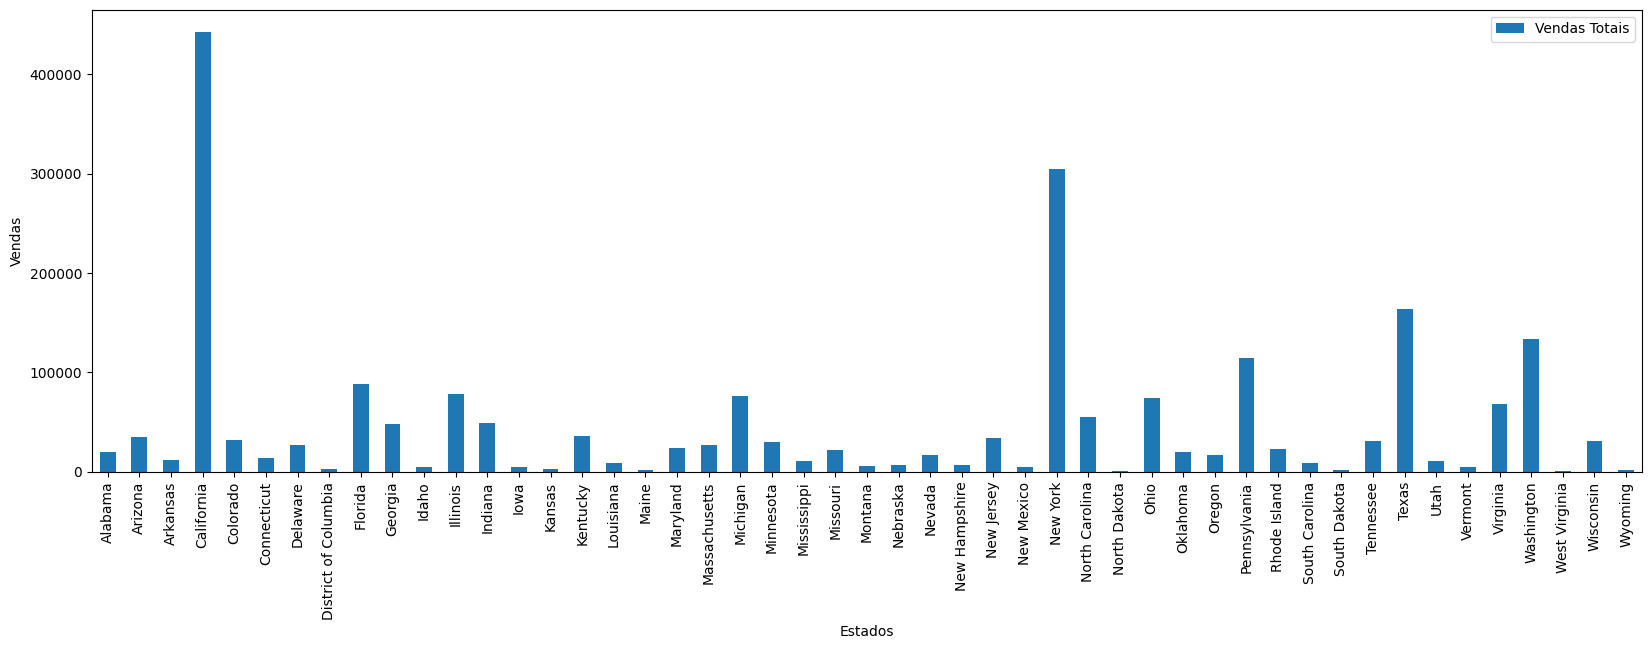

In [19]:
df_TotalEstado = df_dsa.groupby('Estado')['Valor_Venda'].sum()
plt.figure(figsize = (20, 6))
df_TotalEstado.plot(x='Estado', y = 'Valor_Venda', label = 'Vendas Totais', kind = 'bar')

plt.xlabel('Estados')
plt.ylabel('Vendas')
plt.legend()
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [20]:
df_cidadeVendas = df_dsa.groupby('Cidade')['Valor_Venda'].sum

df_cidadeVendas.nlargest(10,'Valor_Venda')

AttributeError: 'function' object has no attribute 'nlargest'

Cidade
Aberdeen         25.500
Abilene           1.392
Akron          2724.244
Albuquerque    2220.160
Alexandria     5519.570
                 ...   
Woonsocket      195.550
Yonkers        7657.666
York            817.978
Yucaipa          50.800
Yuma            840.865
Name: Valor_Venda, Length: 528, dtype: float64


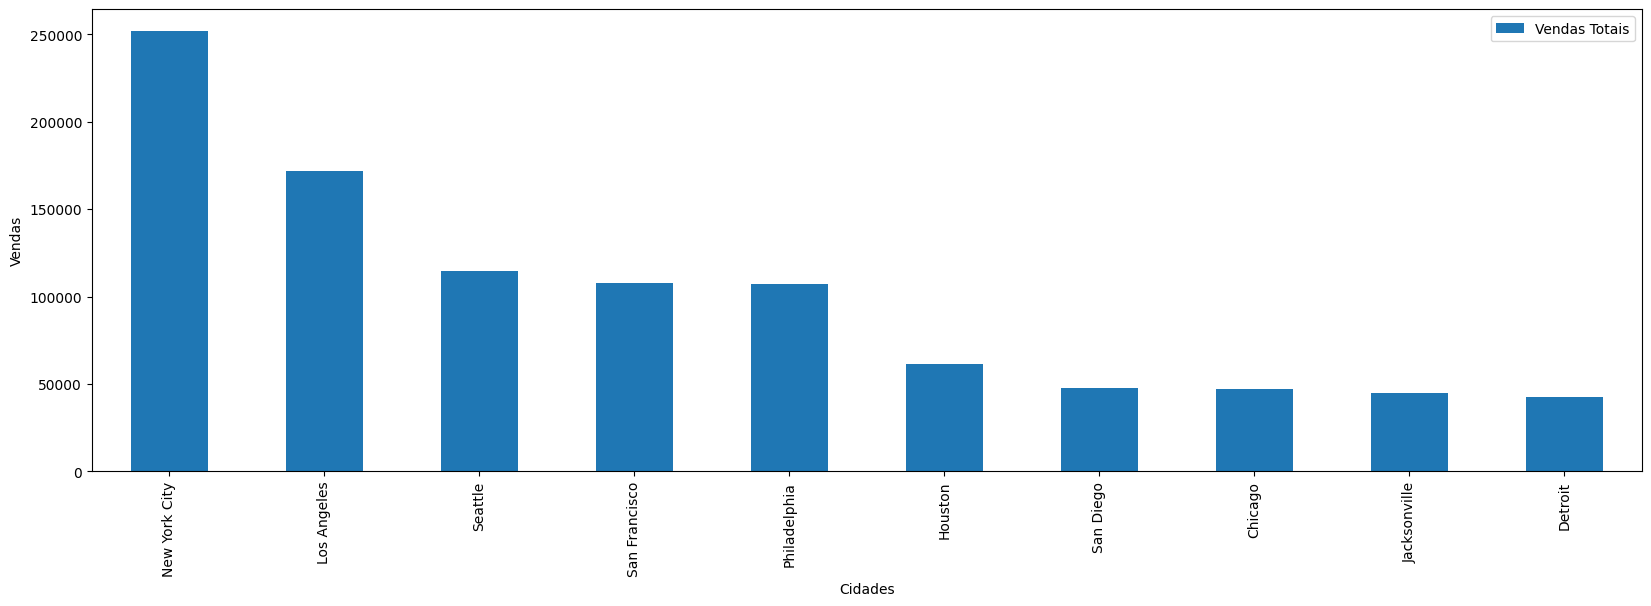

In [ ]:
# Agrupar os dados por cidade e somar os valores de venda
df_cidadeVendas = df_dsa.groupby('Cidade')['Valor_Venda'].sum()
print(df_cidadeVendas)

# Filtrar as 10 cidades com maior valor de vendas usando nlargest diretamente no DataFrame
top_10_cidades = df_cidadeVendas.nlargest(10)



# Configurar o tamanho da figura
plt.figure(figsize=(20, 6))

# Criar o gráfico de barras
top_10_cidades.plot(x='Cidade', y = 'Valor_Venda', label = 'Vendas Totais', kind = 'bar')

# Adicionar título e rótulos aos eixos

plt.xlabel('Cidades')
plt.ylabel('Vendas')

# Adicionar a legenda
plt.legend()

# Exibir o gráfico
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

      Segmento   Valor_Venda
2  Home Office  4.224914e+05
1    Corporate  6.792322e+05
0     Consumer  1.133834e+06


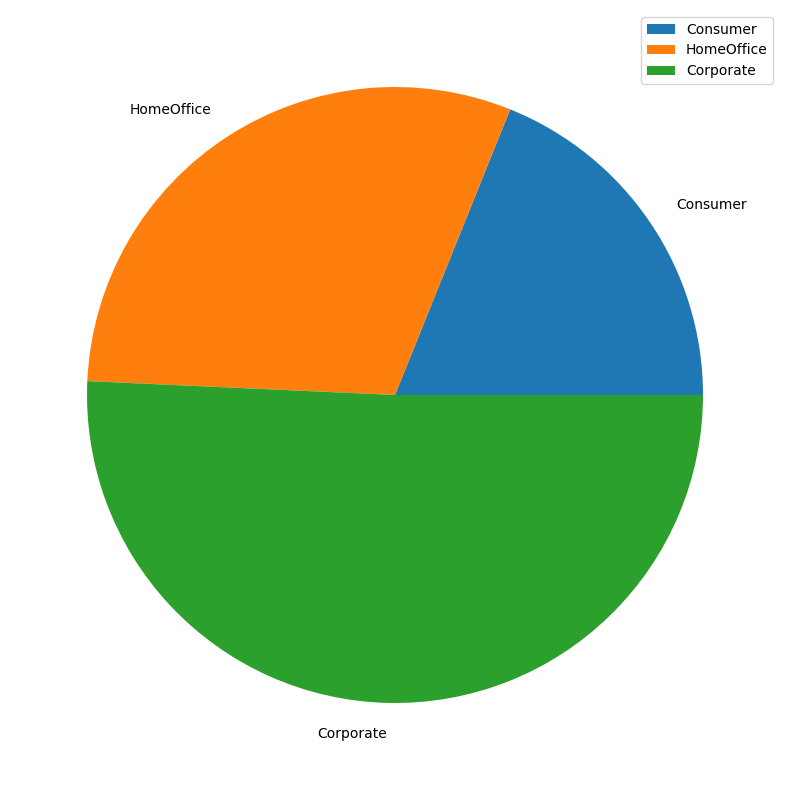

In [ ]:
df_Consumer = df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda')

print(df_Consumer)
plt.figure(figsize=(20,10))
plt.pie(df_Consumer['Valor_Venda'],labels = ['Consumer','HomeOffice','Corporate'])
plt.legend()


## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [ ]:
df_dsa['Ano_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'], format='%d/%m/%Y').dt.year

print(df_dsa['Ano_Pedido'])

df_dsa6 = df_dsa[['Ano_Pedido','Valor_Venda','Segmento']].groupby(['Ano_Pedido', 'Segmento'])['Valor_Venda'].mean()

df_dsa6

0       2017
1       2017
2       2017
3       2016
4       2016
        ... 
9695    2018
9696    2018
9697    2018
9698    2017
9699    2018
Name: Ano_Pedido, Length: 9700, dtype: int64


Ano_Pedido  Segmento   
2015        Consumer       250.703044
            Corporate      211.461505
            Home Office    292.149297
2016        Consumer       239.004738
            Corporate      191.071872
            Home Office    221.958483
2017        Consumer       223.785537
            Corporate      263.982779
            Home Office    230.310282
2018        Consumer       200.098764
            Corporate      244.044278
            Home Office    242.617961
Name: Valor_Venda, dtype: float64

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [ ]:

df_dsaVendas1000mais = df_dsa.query('Valor_Venda>1000')



df_dsaVendas1000menos = df_dsa.query('Valor_Venda<1000')

numvendas15 = df_dsaVendas1000mais.shape[0]

print(f"Quantidade de vendas que receberiam 15% de desconto: {numvendas15}")

df_dsaVendas1000mais['Valor_Venda']
df_dsaVendas1000menos['Valor_Venda']

Quantidade de vendas que receberiam 15% de desconto: 457


0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9695     22.8300
9696     54.3200
9697    196.7760
9698      3.6200
9699     11.5400
Name: Valor_Venda, Length: 9243, dtype: float64

## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [ ]:
df_dsa['Desconto'] = np.where(df_dsa['Valor_Venda'] > 1000, 0.15, 0.10)

In [ ]:
df_dsa['Desconto15'] = df_dsaVendas1000mais['Valor_Venda']

## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [ ]:
df_dsa['Ms'] = pd.to_datetime(df_dsa['Data_Pedido'], format='%d/%m/%Y').dt.month

df_dsa9 = df_dsa.groupby(["Ano_Pedido","Ms","Segmento"])['Valor_Venda'].mean()

df_dsa9

KeyError: 'Ano_Pedido'

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

# Fim